In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data from csv to a data frame
flights = pd.read_csv('flights.csv')

In [12]:
# Bins will be five minutes in width, so the number of bins
# is (length of interval / 5). Limit delays to [-60, +120] minutes using the range.

## 每5分钟一个区间，所以区间的数量是（120-（-60））/ 5 = 36
arr_hist, edges = np.histogram(flights['arr_delay'], bins = int(180/5), range = [-60,120])
print('arr_hist:')
print(arr_hist)
print('\n')
print('edges:')
print(edges)

arr_hist:
[  276   636  1394  2820  5339  9420 15551 23546 31319 34857 33790 29786
 24391 19028 14894 11324  8815  7159  5908  4896  4130  3630  3139  2782
  2455  2179  1973  1805  1646  1454  1360  1286  1167  1013   945  1000]


edges:
[ -60.  -55.  -50.  -45.  -40.  -35.  -30.  -25.  -20.  -15.  -10.   -5.
    0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.]


/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [17]:
left_edges = edges[:-1]
left_edges

array([ -60.,  -55.,  -50.,  -45.,  -40.,  -35.,  -30.,  -25.,  -20.,
        -15.,  -10.,   -5.,    0.,    5.,   10.,   15.,   20.,   25.,
         30.,   35.,   40.,   45.,   50.,   55.,   60.,   65.,   70.,
         75.,   80.,   85.,   90.,   95.,  100.,  105.,  110.,  115.])

In [18]:
right_edges = edges[1:]
right_edges

array([ -55.,  -50.,  -45.,  -40.,  -35.,  -30.,  -25.,  -20.,  -15.,
        -10.,   -5.,    0.,    5.,   10.,   15.,   20.,   25.,   30.,
         35.,   40.,   45.,   50.,   55.,   60.,   65.,   70.,   75.,
         80.,   85.,   90.,   95.,  100.,  105.,  110.,  115.,  120.])

In [28]:
delays = pd.DataFrame({'flights': arr_hist,
                       'left': left_edges,
                       'right': right_edges})
delays

,flights,left,right
0,276,-60.0,-55.0
1,636,-55.0,-50.0
2,1394,-50.0,-45.0
3,2820,-45.0,-40.0
4,5339,-40.0,-35.0
5,9420,-35.0,-30.0
6,15551,-30.0,-25.0
7,23546,-25.0,-20.0
8,31319,-20.0,-15.0
9,34857,-15.0,-10.0


In [25]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [90]:
# Create the blank figure
p = figure(plot_height = 600, plot_width = 600
           , title = 'Histogram of Arrival Delays'
           , x_axis_label = 'Delay(min)', y_axis_label = 'Number of Flights')

In [91]:
# Add a quad glyph
p.quad(bottom = 0, top = delays['flights']
       ,left = delays['left']
       , right = delays['right']
       ,fill_color='red', line_color='black')
output_notebook()
show(p)

Loading BokehJS ...

In [92]:
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource

# Convert dataframe to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['flights', 'left', 'right', 'index'])

In [125]:
# Create the blank figure
p = figure(plot_height = 600, plot_width = 600
           , title = 'Histogram of Arrival Delays'
           , x_axis_label = 'Delay(min)', y_axis_label = 'Number of Flights')

# Add a quad glyph using source of coulumndatasource
p.quad(source =src, bottom = 0, top = 'flights'
       ,left = 'left'
       , right = 'right'
       ,fill_color='red', line_color='black')

# Hover tool referring to our data fields using @ and 
# a positon using $
from bokeh.models import HoverTool
h = HoverTool(tooltips = [('Delay Interval Left','@left'),('(x,y)','($x,$y)')])

# Add the hover tool to the graph
p.add_tools(h)

# Show the plot
show(p)

In [123]:
# Add a column in data frame showing the extent of each interval
delays['f_interval'] = ['%d to %d minutes' % (left,right) for left,right in zip(delays['left'],delays['right'])]

# Convert the new data frame to columndatasource
src_2 = ColumnDataSource(delays)

# Create the blank figure
p = figure(plot_height = 600, plot_width = 600
           , title = 'Histogram of Arrival Delays'
           , x_axis_label = 'Delay(min)', y_axis_label = 'Number of Flights')

# Add a quad glyph using source of coulumndatasource
p.quad(source =src_2, bottom = 0, top = 'flights'
       ,left = 'left'
       ,right = 'right'
       ,fill_color='red', line_color='black',hover_fill_color='navy')

# Hover tool referring to our data field 'f_interval' using @ 
h = HoverTool(tooltips = [('Delay:','@f_interval'),('Num of Flights:','@flights')])

# Add the hover tool to the graph
p.add_tools(h)


# Show the plot
show(p)

In [126]:
# Import savings function
from bokeh.io import output_file
# Specify the output file and save
output_file('hist.html')
show(p)

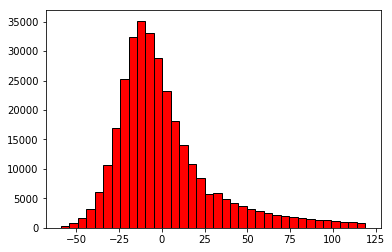

In [77]:
# Appendix
import matplotlib.pyplot as plt

# Filter data
index = flights['arr_delay'] > -60 & (flights['arr_delay'] < 120)
delays_edited = flights[(flights.arr_delay > -60) & (flights.arr_delay <120)]['arr_delay']

# Draw histgram
plt.hist(delays_edited, bins = int(180/5), color = 'red', edgecolor = 'k', label = '直方图')
plt.show()